# Préparation des données

In [83]:
import pandas as pd

df = pd.read_csv('./amazon_embeddings.csv')

Drop de colonnes non pertinentes

In [84]:
feature_to_drop = df.drop(["product_name", "product_name_embedding"], axis=1)
df = df.drop(feature_to_drop, axis=1)
df

,product_name,product_name_embedding
0,Wayona Nylon Braided USB to Lightning Fast Cha...,"[-0.033721923828125, 0.0179290771484375, 0.045..."
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,"[-0.02557373046875, -0.0013399124145507812, 0...."
2,Sounce Fast Phone Charging Cable & Data Sync U...,"[-0.04168701171875, 0.06256103515625, 0.048950..."
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,"[-0.020904541015625, -0.001110076904296875, 0...."
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,"[-0.033050537109375, 0.037811279296875, 0.0328..."
...,...,...
1460,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,"[-0.0299835205078125, 0.004344940185546875, 0...."
1461,Prestige Delight PRWO Electric Rice Cooker (1 ...,"[-0.02362060546875, -0.0162506103515625, 0.021..."
1462,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"[-0.0224609375, 0.006977081298828125, 0.007530..."
1463,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"[-0.038909912109375, 0.0166015625, 0.035919189..."


In [85]:
def str_to_list_float(s):
    """
    Convertit une chaîne de caractères de la forme '[0.1,0.5,0.3]' en une liste de flottants.

    Paramètres :
        s (str) : La chaîne à convertir.
    
    Retourne :
        list[float] : Une liste de flottants.
    """
    try:
        # Enlever les crochets
        s = s.strip('[]')
        # Diviser la chaîne en éléments
        elements = s.split(',')
        # Convertir chaque élément en float
        return [float(item.strip()) for item in elements if item.strip() != '']
    except ValueError as e:
        raise ValueError(f"Erreur lors de la conversion : {e}")


In [86]:
# Convertir les colonnes en listes de flottants
df['product_name_embedding'] = df['product_name_embedding'].apply(str_to_list_float)
print(df['product_name_embedding'][42])

[-0.0225830078125, 0.022735595703125, 0.05194091796875, -0.028472900390625, 0.037200927734375, 0.00931549072265625, 0.02288818359375, -0.015411376953125, 0.00014126300811767578, -0.03192138671875, -0.01983642578125, 0.056610107421875, 0.00580596923828125, 0.004360198974609375, -0.025787353515625, 0.0162811279296875, 0.0026645660400390625, 0.035308837890625, 0.047149658203125, -0.00603485107421875, -0.03643798828125, -0.005062103271484375, -0.063232421875, 0.00461578369140625, -0.0191802978515625, -0.00909423828125, -0.016204833984375, -0.049652099609375, -0.035125732421875, -0.0097808837890625, 0.0271453857421875, -0.03265380859375, -0.01055908203125, 0.037078857421875, 0.05987548828125, -0.018646240234375, 0.0153350830078125, -0.004932403564453125, 0.0204315185546875, 0.0328369140625, -0.0214080810546875, -0.00653076171875, -0.0013570785522460938, 0.031829833984375, -0.00908660888671875, 0.01715087890625, -0.01320648193359375, -0.003604888916015625, 0.003841400146484375, -0.0389404296

# Algo de clustering

Méthode du coude

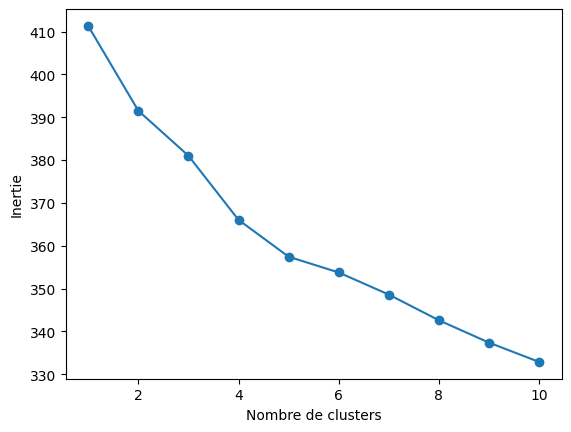

In [87]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df["product_name_embedding"].tolist())
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.show()

Méthode de la silhouette

Score de silhouette pour 2 clusters : 0.052617295913798545
Score de silhouette pour 3 clusters : 0.0398343054035119
Score de silhouette pour 4 clusters : 0.05501455864391777
Score de silhouette pour 5 clusters : 0.0635068052241108
Score de silhouette pour 6 clusters : 0.061447638408105326
Score de silhouette pour 7 clusters : 0.061901784677837475
Score de silhouette pour 8 clusters : 0.07220757183196878
Score de silhouette pour 9 clusters : 0.0726204095728593
Score de silhouette pour 10 clusters : 0.0679754886492917


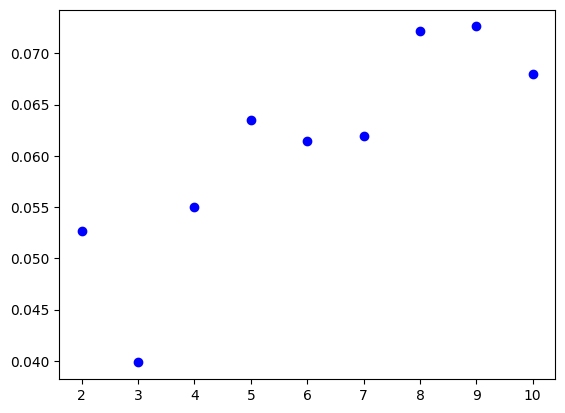

In [88]:
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df["product_name_embedding"].tolist())
    score = silhouette_score(df["product_name_embedding"].tolist(), labels)
    print(f"Score de silhouette pour {k} clusters : {score}")
    plt.scatter(k, score, color='blue')

K-mean

In [89]:
optimal_k = 9

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(df["product_name_embedding"].tolist())

# Analyse des clusters

c:\Users\simon\Documents\VSC\Mistral_hackathon\quantum-black-hackathon\venv\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


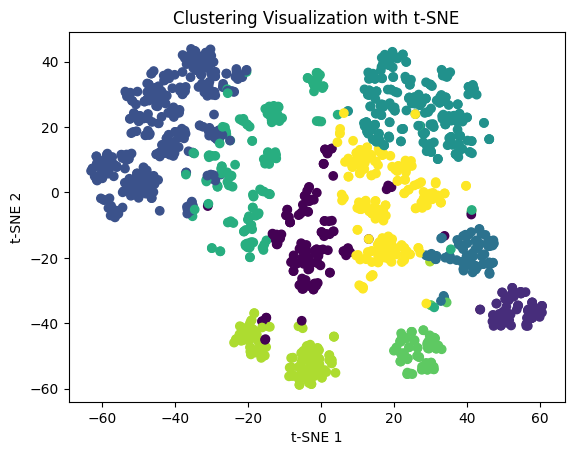

In [90]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Appliquer t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
reduced_data_tsne = tsne.fit_transform(np.array(df['product_name_embedding'].tolist()))

# Ajouter les composantes t-SNE au DataFrame
df['tsne1'] = reduced_data_tsne[:, 0]
df['tsne2'] = reduced_data_tsne[:, 1]

# Visualisation des clusters avec t-SNE
plt.scatter(df['tsne1'], df['tsne2'], c=df['cluster'], cmap='viridis')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('Clustering Visualization with t-SNE')
plt.show()
